# 합성곱신경망(CNN)

In [19]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [20]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 #흑백 이미지 명시를 위해 (_, _, _, 1) 사용 컬러면 3 사용

In [21]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [22]:
train_scaled.shape

(48000, 28, 28, 1)

## CNN 모델만들기

In [23]:
model = keras.Sequential()

In [24]:
# 1차 합성곱 신경망
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size=3,
        activation='relu',
        padding='same',
        input_shape = (28, 28, 1)
    )
)

In [25]:
# polling
model.add(keras.layers.MaxPooling2D(2))

In [26]:
# 2차 합성곱 신경망
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size=3,
        activation='relu',
        padding='same'
    )
)

In [27]:
# DNN
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │     1,254,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,274,326 (4.86 MB)

 Trainable params: 1,274,326 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'best-cnn-model.keras', # 저장된 파일의 이름
    save_best_only=True, # 단 하나만 저장
)

es_cb = keras.callbacks.EarlyStopping(
    patience=2, # 두번 증가하면 멈춤
    restore_best_weights=True # 가장 좋은 값 저장
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7736 - loss: 0.6420 - val_accuracy: 0.8950 - val_loss: 0.2895
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8868 - loss: 0.3193 - val_accuracy: 0.9108 - val_loss: 0.2378
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9052 - loss: 0.2620 - val_accuracy: 0.9061 - val_loss: 0.2521
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9198 - loss: 0.2205 - val_accuracy: 0.9175 - val_loss: 0.2254
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9290 - loss: 0.1927 - val_accuracy: 0.9262 - val_loss: 0.2056
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9374 - loss: 0.1707 - val_accuracy: 0.9300 - val_loss: 0.2107
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9421 - loss: 0.1570 - val_accuracy: 0.9312 - val_loss: 0.2063


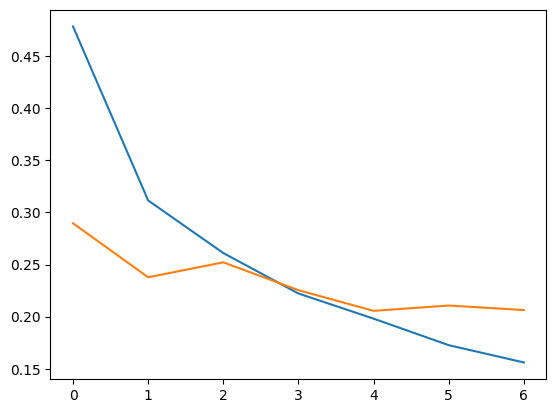

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_)

In [36]:
val_scaled[0].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.19215686, 0.6       , 0.74509804, 0.76862745,
        0.74509804, 0.56078431, 0.09803922, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.        , 0.        ,
        0.62352941, 0.71372549, 0.46666667, 0.11372549, 0.0627451 ,
        0.13333333, 0.45882353, 0.96470588, 0.38823529, 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02352941, 0.        , 0.62352941,
        0.52941176, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

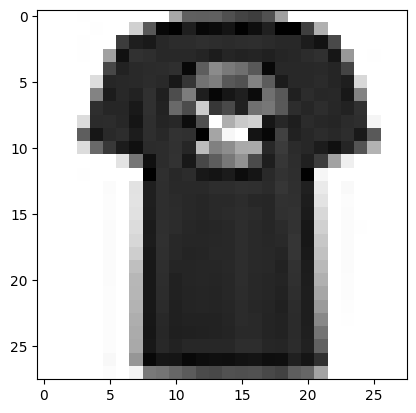

In [40]:
plt.imshow(val_scaled[1].reshape(28, 28), cmap='gray_r')
plt.show()

In [41]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.01, 0.  , 0.34, 0.  , 0.63, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.9 , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [43]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9200 - loss: 0.2373


[0.23282626271247864, 0.9211999773979187]

In [44]:
test_input.shape

(10000, 28, 28)